In [ ]:
test_dict = {}
# plotting the time elapsed for different core numbers (filename = cdr_gen_c{}_1_1.out) and the line starts with Execution time:
with open('cdr_gen_c128_1_1.out', 'r') as f:
    for line in f:
        if line.startswith('Execution time:'):
            test_dict['execution'] = line.split(': ')[1].split(' ')[0].strip()
        if line.startswith('Current memory usage:'):
            test_dict['current_mem'] = line.split(': ')[1].split(' ')[0].strip()
        if line.startswith('Peak memory usage:'):
            test_dict['peak_mem'] = line.split(': ')[1].split(' ')[0].strip()
print(test_dict)

{'execution': '-926.838395', 'current_mem': '164.94', 'peak_mem': '728.89'}


In [2]:
import pandas as pd
df = pd.DataFrame.from_dict(test_dict,orient='index')
print(df)

NameError: name 'test_dict' is not defined

In [5]:
import glob
all_data = []

# Find all cdr_gen_*.out files
for filename in glob.glob('cdr_gen_*.out'):
    test_dict = {}
    
    # Extract core number from filename
    core_number = filename.split('_')[2][1:]  # Assumes format cdr_gen_c{}_1_1.out
    test_dict['cores'] = core_number
    
    with open(filename, 'r') as f:
        for line in f:
            if line.startswith('Execution time:'):
                test_dict['execution'] = line.split(': ')[1].split(' ')[0].strip().strip('-')
            if line.startswith('Current memory usage:'):
                test_dict['current_mem'] = line.split(': ')[1].split(' ')[0].strip()
            if line.startswith('Peak memory usage:'):
                test_dict['peak_mem'] = line.split(': ')[1].split(' ')[0].strip()
    
    all_data.append(test_dict)

# Create DataFrame from all collected data
df = pd.DataFrame(all_data)

print(df)

   cores    execution current_mem peak_mem
0     32   984.582210      164.94   728.89
1      4  2241.269627      164.94   728.89
2     16  1221.823438      164.94   728.89
3     38   935.647126      164.92   728.87
4     64   917.155109      164.94   728.89
5     56   818.447639      164.94   728.89
6     44   930.891837      164.94   728.89
7      1  2827.867319      164.94   728.88
8      2  2968.299501      164.94   728.89
9     62  1155.064399      164.94   728.89
10    50   930.790076      164.93   728.88
11     8  1536.915375      164.94   728.89
12   128   926.838395      164.94   728.89


    cores    execution current_mem peak_mem
0      32   984.582210      164.94   728.89
1       4  2241.269627      164.94   728.89
2      16  1221.823438      164.94   728.89
3      38   935.647126      164.92   728.87
4      64   917.155109      164.94   728.89
5      56   818.447639      164.94   728.89
6      44   930.891837      164.94   728.89
7       1  2827.867319      164.94   728.88
8       2  2968.299501      164.94   728.89
9      62  1155.064399      164.94   728.89
10     50   930.790076      164.93   728.88
11      8  1536.915375      164.94   728.89
12    128   926.838395      164.94   728.89
    cores    execution current_mem peak_mem
7       1  2827.867319      164.94   728.88
8       2  2968.299501      164.94   728.89
1       4  2241.269627      164.94   728.89
11      8  1536.915375      164.94   728.89
2      16  1221.823438      164.94   728.89
0      32   984.582210      164.94   728.89
3      38   935.647126      164.92   728.87
6      44   930.891837      164.

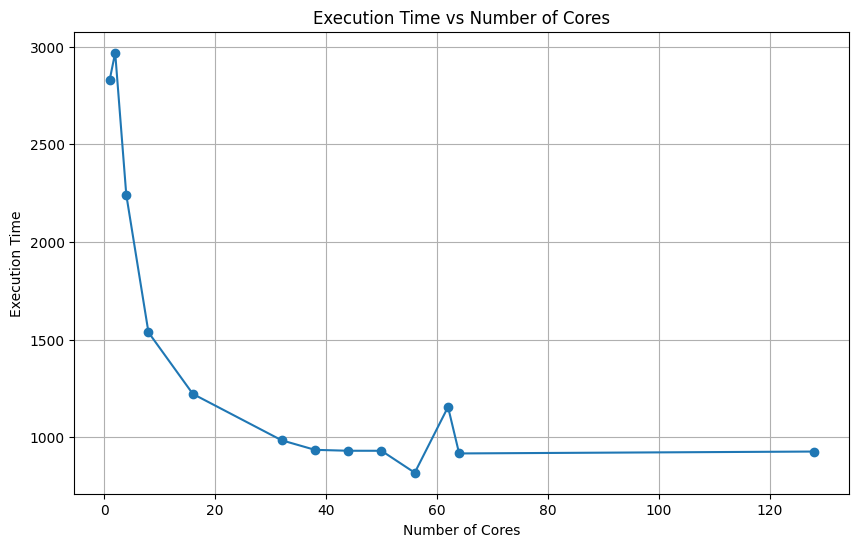

In [6]:
import matplotlib.pyplot as plt
df['execution'] = df['execution'].astype(float)
df['cores'] = df['cores'].astype(int)
print(df)
df = df.sort_values(by='cores', ascending=True)
print(df)
# Assuming your DataFrame is named 'df'
plt.figure(figsize=(10, 6))
plt.plot(df['cores'], df['execution'], marker='o')
plt.xlabel('Number of Cores')
plt.ylabel('Execution Time')
plt.title('Execution Time vs Number of Cores')
plt.grid(True)
plt.show()

    cores    execution current_mem  peak_mem
7       1  2827.867319      164.94    728.88
8       2  2968.299501      164.94    728.89
1       4  2241.269627      164.94    728.89
11      8  1536.915375      164.94    728.89
2      16  1221.823438      164.94    728.89
0      32   984.582210      164.94    728.89
3      38   935.647126      164.92    728.87
6      44   930.891837      164.94    728.89
10     50   930.790076      164.93    728.88
5      56   818.447639      164.94    728.89
9      62  1155.064399      164.94    728.89
4      64   917.155109      164.94    728.89
12    128   926.838395      164.94    728.89


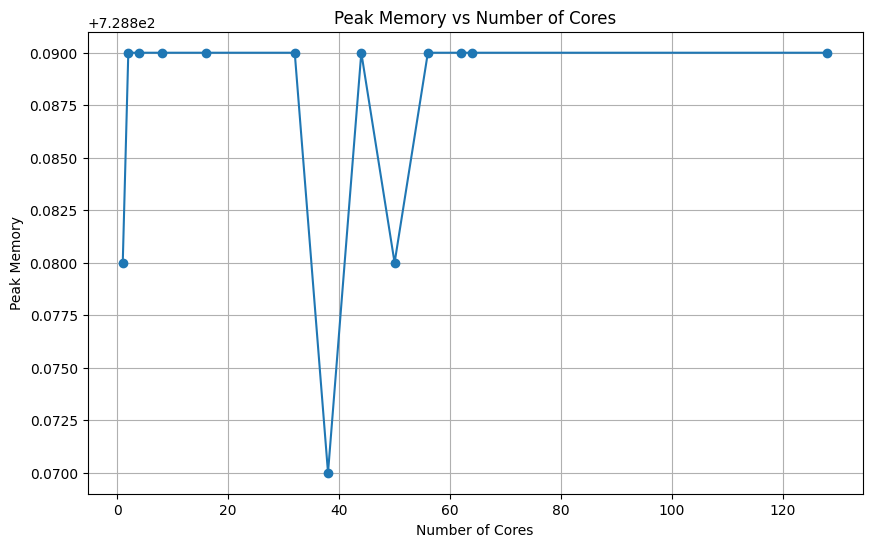

In [7]:
import matplotlib.pyplot as plt
df['peak_mem'] = df['peak_mem'].astype(float)
print(df)

# Assuming your DataFrame is named 'df'
plt.figure(figsize=(10, 6))
plt.plot(df['cores'], df['peak_mem'], marker='o')
plt.xlabel('Number of Cores')
plt.ylabel('Peak Memory')
plt.title('Peak Memory vs Number of Cores')
plt.grid(True)
plt.show()

In [ ]:
import os
os.chdir('/home/mpg01/MBPC/fatma.chafra01/ColabDesign/af/examples')
os.getcwd()

'/home/mpg01/MBPC/fatma.chafra01/ColabDesign/af/examples'

In [ ]:
# Python script to generate SLURM submission scripts
def create_submission_script(num_cores):
    # Define the content of the SLURM script
    script_content = f"""#!/bin/bash

#SBATCH --output=cdr_gen_c{num_cores}_1_1.out
#SBATCH --error=cdr_gen_c{num_cores}_1_1.err
#SBATCH -c {num_cores}
#SBATCH -p soeding
#SBATCH --mem=32GB
#SBATCH -t 00-01:00:00

python3 -u /usr/users/fatma.chafra01/ColabDesign/af/examples/nb_cdr_generation_{num_cores}.py -o pssm_semigreedy -g sgd -s 1 -d 1 -w weights_test.csv
"""

    # Write the content to a file named submission_{num_cores}.sh
    filename = f"submission_{num_cores}.sh"
    with open(filename, "w") as file:
        file.write(script_content)
    print(f"Created {filename}")


# List of core numbers for which to create submission scripts
core_numbers = [38, 44, 50, 56, 62]  # Example core numbers; modify as needed

# Generate a submission script for each core number
for num_cores in core_numbers:
    create_submission_script(num_cores)

Created submission_38.sh
Created submission_44.sh
Created submission_50.sh
Created submission_56.sh
Created submission_62.sh


In [5]:
import numpy as np
# create sets of weights for the optimization (row-wise: folding (plddt - pae), structure matching (RMSD - dgram_cce), interface (i_pae), seq entropy , other (con - i_con - fape - exp_res - helix) as discussed by amir)
ratios = np.array([
    [4, 2, 2, 1, 0],
    [8, 4, 2, 1, 0],
    [16, 8, 4, 1, 0],
    [24, 12, 6, 1, 0],
    [20, 4, 2, 1, 0],
    [20, 8, 4, 1, 0],
    [4, 4, 2, 1, 0],
    [8, 8, 2, 1, 0],
    [4, 4, 4, 1, 0],
    [8, 8, 4, 1, 0]
])
print(ratios)

[[ 4  2  2  1  0]
 [ 8  4  2  1  0]
 [16  8  4  1  0]
 [24 12  6  1  0]
 [20  4  2  1  0]
 [20  8  4  1  0]
 [ 4  4  2  1  0]
 [ 8  8  2  1  0]
 [ 4  4  4  1  0]
 [ 8  8  4  1  0]]


In [12]:
# real weights list: order_weights = ['con', 'dgram_cce', 'exp_res', 'fape', 'helix', 'i_con', 'i_pae', 'pae', 'plddt', 'rmsd', 'seq_ent']
# Duplicate the first two elements of each row (to match the number of real metrics/weights they will correspond to)
#duplicated_ratios = np.array([row[:2].repeat(2).tolist() + [row[3]] for row in ratios])
#print(duplicated_ratios)
# Create a new array with the modified structure
modified_ratios = np.column_stack((
    np.repeat(ratios[:, 0:2], 2, axis=1),  # Duplicate first two elements
    ratios[:, 2:4],                    # Keep the next two elements as is
    np.repeat(ratios[:, 4:8], 5, axis=1)             # Triplicate the last element
))

print(modified_ratios)


[[ 4  4  2  2  2  1  0  0  0  0  0]
 [ 8  8  4  4  2  1  0  0  0  0  0]
 [16 16  8  8  4  1  0  0  0  0  0]
 [24 24 12 12  6  1  0  0  0  0  0]
 [20 20  4  4  2  1  0  0  0  0  0]
 [20 20  8  8  4  1  0  0  0  0  0]
 [ 4  4  4  4  2  1  0  0  0  0  0]
 [ 8  8  8  8  2  1  0  0  0  0  0]
 [ 4  4  4  4  4  1  0  0  0  0  0]
 [ 8  8  8  8  4  1  0  0  0  0  0]]


In [13]:
# Normalize each row so that it sums to 1
normalized_ratios = modified_ratios / modified_ratios.sum(axis=1, keepdims=True)
print(normalized_ratios)

[[0.26666667 0.26666667 0.13333333 0.13333333 0.13333333 0.06666667
  0.         0.         0.         0.         0.        ]
 [0.2962963  0.2962963  0.14814815 0.14814815 0.07407407 0.03703704
  0.         0.         0.         0.         0.        ]
 [0.30188679 0.30188679 0.1509434  0.1509434  0.0754717  0.01886792
  0.         0.         0.         0.         0.        ]
 [0.30379747 0.30379747 0.15189873 0.15189873 0.07594937 0.01265823
  0.         0.         0.         0.         0.        ]
 [0.39215686 0.39215686 0.07843137 0.07843137 0.03921569 0.01960784
  0.         0.         0.         0.         0.        ]
 [0.32786885 0.32786885 0.13114754 0.13114754 0.06557377 0.01639344
  0.         0.         0.         0.         0.        ]
 [0.21052632 0.21052632 0.21052632 0.21052632 0.10526316 0.05263158
  0.         0.         0.         0.         0.        ]
 [0.22857143 0.22857143 0.22857143 0.22857143 0.05714286 0.02857143
  0.         0.         0.         0.         0.  

In [14]:
# re-order them to match the order necessary to input them as the weights parameter in nb_generation.py: 
# current order:
# plddt, pae, RMSD, dgram_cce, i_pae, seq entropy, con, i_con, fape, exp_res, helix
# con, dgram_cce, exp_res, fape, helix, i_con, i_pae, pae, plddt, rmsd, seq_ent
new_order = [6, 3, 9, 8, 10, 7, 4, 1, 0, 2, 5] # all of them here, none missing
reordered_matrix = normalized_ratios[:, new_order]
print(reordered_matrix)


[[0.         0.13333333 0.         0.         0.         0.
  0.13333333 0.26666667 0.26666667 0.13333333 0.06666667]
 [0.         0.14814815 0.         0.         0.         0.
  0.07407407 0.2962963  0.2962963  0.14814815 0.03703704]
 [0.         0.1509434  0.         0.         0.         0.
  0.0754717  0.30188679 0.30188679 0.1509434  0.01886792]
 [0.         0.15189873 0.         0.         0.         0.
  0.07594937 0.30379747 0.30379747 0.15189873 0.01265823]
 [0.         0.07843137 0.         0.         0.         0.
  0.03921569 0.39215686 0.39215686 0.07843137 0.01960784]
 [0.         0.13114754 0.         0.         0.         0.
  0.06557377 0.32786885 0.32786885 0.13114754 0.01639344]
 [0.         0.21052632 0.         0.         0.         0.
  0.10526316 0.21052632 0.21052632 0.21052632 0.05263158]
 [0.         0.22857143 0.         0.         0.         0.
  0.05714286 0.22857143 0.22857143 0.22857143 0.02857143]
 [0.         0.19047619 0.         0.         0.        

In [16]:
column_names = 'con,dgram_cce,exp_res,fape,helix,i_con,i_pae,pae,plddt,rmsd,seq_ent'

# Save the array to a CSV file with column names
np.savetxt("test_weights.csv", reordered_matrix, delimiter=",", fmt='%.6f', header=column_names, comments='')


In [19]:
import os
os.mkdir('/usr/users/fatma.chafra01/ColabDesign/af/examples/weights_test')
import csv
# each row is a set of weights to be used in one run so will create new weights_test.csv file for each run
for i in range(reordered_matrix.shape[0]):
    filename = f"/usr/users/fatma.chafra01/ColabDesign/af/examples/weights_test/weights_test_{i}.csv"
    print(i)
    with open(filename, 'w', newline='') as f:
        writer = csv.writer(f)
    
        # Write the i-th row to the CSV file
        writer.writerow(reordered_matrix[i])
    print(f"Row {i} has been written to {filename}")

0
Row 0 has been written to /usr/users/fatma.chafra01/ColabDesign/af/examples/weights_test/weights_test_0.csv
1
Row 1 has been written to /usr/users/fatma.chafra01/ColabDesign/af/examples/weights_test/weights_test_1.csv
2
Row 2 has been written to /usr/users/fatma.chafra01/ColabDesign/af/examples/weights_test/weights_test_2.csv
3
Row 3 has been written to /usr/users/fatma.chafra01/ColabDesign/af/examples/weights_test/weights_test_3.csv
4
Row 4 has been written to /usr/users/fatma.chafra01/ColabDesign/af/examples/weights_test/weights_test_4.csv
5
Row 5 has been written to /usr/users/fatma.chafra01/ColabDesign/af/examples/weights_test/weights_test_5.csv
6
Row 6 has been written to /usr/users/fatma.chafra01/ColabDesign/af/examples/weights_test/weights_test_6.csv
7
Row 7 has been written to /usr/users/fatma.chafra01/ColabDesign/af/examples/weights_test/weights_test_7.csv
8
Row 8 has been written to /usr/users/fatma.chafra01/ColabDesign/af/examples/weights_test/weights_test_8.csv
9
Row 9 ha

In [16]:
print(final_weights.shape[0])
print(range(0, final_weights.shape[0]))

10
range(0, 10)


In [23]:
import os
# Python script to generate SLURM submission scripts
def create_submission_script_parameters(pdb_file, soft, hard, num_models, weight_csv, recycles, antigen_target, nb_binder, nb_binder_seq, pdb_id, 
                                        additional_description, mem='32', time='14-00:00:00', optimizer='pssm_semigreedy', gd='adam', logits=0, 
                                     learning_rate=0.01,  core=38, use_templates='True', rm_template_ic='False', bias='True', bias_matrix='None'):
    weight_no = weight_csv.split('/')[-1].split('weights_test_')[-1].split(".")[0]
    directory = f"/usr/users/fatma.chafra01/ColabDesign/af/examples/{pdb_id}"
    if not os.path.exists(directory):
        os.makedirs(directory)
        print(f"Directory '{directory}' created successfully.")
    else:
        print(f"Directory '{directory}' already exists.")
    # Define the content of the SLURM script
    script_content = f"""#!/bin/bash

#SBATCH --output={pdb_id}/antigen_{antigen_target}_nb_{nb_binder}_{additional_description}_cdr_gen_c{core}_l{logits}_s{soft}_h{hard}_weights_test_{weight_no}_models_{num_models}_recycles_{recycles}_use_templates_{use_templates}_rm_templates_ic_{rm_template_ic}_bias_{bias}.out
#SBATCH --error={pdb_id}/antigen_{antigen_target}_nb_{nb_binder}_{additional_description}_cdr_gen_c{core}_l{logits}_s{soft}_h{hard}_weights_test_{weight_no}_models_{num_models}_recycles_{recycles}_use_templates_{use_templates}_rm_templates_ic_{rm_template_ic}_bias_{bias}.err
#SBATCH -c {core}
#SBATCH -p soeding
#SBATCH --mem={mem}GB
#SBATCH -t {time}

PYTHONPATH=/usr/users/fatma.chafra01/miniforge3/envs/colabdesign/lib/python3.10/site-packages /usr/users/fatma.chafra01/miniforge3/envs/colabdesign/bin/python -u /usr/users/fatma.chafra01/ColabDesign/af/examples/nb_cdr_generation_new.py -f {pdb_file} -id {pdb_id} -ad {additional_description} -o {optimizer} -g {gd} -l {logits} -s {soft} -d {hard} -r {learning_rate} -w {weight_csv} -e {core} -n {num_models} -c {recycles} -t {use_templates} -x {rm_template_ic} -b {bias} -m {bias_matrix} -a {antigen_target} -nb {nb_binder} -q {nb_binder_seq}
"""
    
    # Write the content to a file named submission_weights_{weight_no}.sh
    filename = f"{pdb_id}_{additional_description}_submission_c{core}_l{logits}_s{soft}_h{hard}_weights_test_{weight_no}_models_{num_models}_recycles_{recycles}_use_templates_{use_templates}_rm_templates_ic_{rm_template_ic}_bias_{bias}.sh"
    with open(filename, "w") as file:
        file.write(script_content)
    print(f"Created {filename}")

In [8]:
import glob
# List of weight_test_{}.csv for which to create submission scripts
file_pattern = "/usr/users/fatma.chafra01/ColabDesign/af/examples/weights_test/weights_test_*.csv"
matching_files = glob.glob(file_pattern)
print(matching_files)

['/usr/users/fatma.chafra01/ColabDesign/af/examples/weights_test/weights_test_8.csv', '/usr/users/fatma.chafra01/ColabDesign/af/examples/weights_test/weights_test_7.csv', '/usr/users/fatma.chafra01/ColabDesign/af/examples/weights_test/weights_test_4.csv', '/usr/users/fatma.chafra01/ColabDesign/af/examples/weights_test/weights_test_2.csv', '/usr/users/fatma.chafra01/ColabDesign/af/examples/weights_test/weights_test_1.csv', '/usr/users/fatma.chafra01/ColabDesign/af/examples/weights_test/weights_test_0.csv', '/usr/users/fatma.chafra01/ColabDesign/af/examples/weights_test/weights_test_3.csv', '/usr/users/fatma.chafra01/ColabDesign/af/examples/weights_test/weights_test_5.csv', '/usr/users/fatma.chafra01/ColabDesign/af/examples/weights_test/weights_test_9.csv', '/usr/users/fatma.chafra01/ColabDesign/af/examples/weights_test/weights_test_6.csv']


In [9]:
# Generate a submission script for each weight_test_{}.csv
for weight in matching_files:
    create_submission_script_parameters(pdb_file='/usr/users/fatma.chafra01/ColabDesign/8ee2.pdb', soft=120, hard=32, num_models=3, 
                                        weight_csv=weight, recycles=3, antigen_target='A', 
                                        nb_binder='C', nb_binder_seq='VQLVESGGGLVQPGGSLRLSCTTSTSLFSITTMGWYRQAPGKQRELVASIKRGGGTNYADSMKGRFTISRDNARNTVFLEMNNLTTEDTAVYYCNAAILAYTGEVTNYWGQGTQVTV', 
                                        mem='32', time='14-00:00:00', optimizer='pssm_semigreedy', gd='adam', logits=0, 
                                        learning_rate=0.01,  core=38, use_templates=True, rm_template_ic=False, bias=True, bias_matrix='af/examples/bias_matrix_8ee2.csv')

Directory '/usr/users/fatma.chafra01/ColabDesign/af/examples/8ee2' already exists.
Created 8ee2_submission_c38_l0_s120_h32_weights_test_8_models_3_recycles_3_use_templates_True_rm_templates_ic_False_bias_True.sh
Directory '/usr/users/fatma.chafra01/ColabDesign/af/examples/8ee2' already exists.
Created 8ee2_submission_c38_l0_s120_h32_weights_test_7_models_3_recycles_3_use_templates_True_rm_templates_ic_False_bias_True.sh
Directory '/usr/users/fatma.chafra01/ColabDesign/af/examples/8ee2' already exists.
Created 8ee2_submission_c38_l0_s120_h32_weights_test_4_models_3_recycles_3_use_templates_True_rm_templates_ic_False_bias_True.sh
Directory '/usr/users/fatma.chafra01/ColabDesign/af/examples/8ee2' already exists.
Created 8ee2_submission_c38_l0_s120_h32_weights_test_2_models_3_recycles_3_use_templates_True_rm_templates_ic_False_bias_True.sh
Directory '/usr/users/fatma.chafra01/ColabDesign/af/examples/8ee2' already exists.
Created 8ee2_submission_c38_l0_s120_h32_weights_test_1_models_3_recyc

In [10]:
# Generate a submission script for each weight_test_{}.csv without bias!!
for weight in matching_files:
    create_submission_script_parameters(pdb_file='/usr/users/fatma.chafra01/ColabDesign/8ee2.pdb', soft=120, hard=32, num_models=3, 
                                        weight_csv=weight, recycles=3, antigen_target='A', 
                                        nb_binder='C', nb_binder_seq='VQLVESGGGLVQPGGSLRLSCTTSTSLFSITTMGWYRQAPGKQRELVASIKRGGGTNYADSMKGRFTISRDNARNTVFLEMNNLTTEDTAVYYCNAAILAYTGEVTNYWGQGTQVTV', 
                                        mem='32', time='14-00:00:00', optimizer='pssm_semigreedy', gd='adam', logits=0, 
                                        learning_rate=0.01,  core=38, use_templates=True, rm_template_ic=False, bias=False)

Directory '/usr/users/fatma.chafra01/ColabDesign/af/examples/8ee2' already exists.
Created 8ee2_submission_c38_l0_s120_h32_weights_test_8_models_3_recycles_3_use_templates_True_rm_templates_ic_False_bias_False.sh
Directory '/usr/users/fatma.chafra01/ColabDesign/af/examples/8ee2' already exists.
Created 8ee2_submission_c38_l0_s120_h32_weights_test_7_models_3_recycles_3_use_templates_True_rm_templates_ic_False_bias_False.sh
Directory '/usr/users/fatma.chafra01/ColabDesign/af/examples/8ee2' already exists.
Created 8ee2_submission_c38_l0_s120_h32_weights_test_4_models_3_recycles_3_use_templates_True_rm_templates_ic_False_bias_False.sh
Directory '/usr/users/fatma.chafra01/ColabDesign/af/examples/8ee2' already exists.
Created 8ee2_submission_c38_l0_s120_h32_weights_test_2_models_3_recycles_3_use_templates_True_rm_templates_ic_False_bias_False.sh
Directory '/usr/users/fatma.chafra01/ColabDesign/af/examples/8ee2' already exists.
Created 8ee2_submission_c38_l0_s120_h32_weights_test_1_models_3_r

In [9]:
# test whether the change to the bias evaluation worked by creating a dummy submission script:
create_submission_script_parameters(pdb_file='/usr/users/fatma.chafra01/ColabDesign/8ee2.pdb', soft=1, hard=1, num_models=1, pdb_id='8ee2',
                                        weight_csv='/usr/users/fatma.chafra01/ColabDesign/af/examples/weights_test/weights_test_0.csv', recycles=0, antigen_target='A', 
                                        nb_binder='C', nb_binder_seq='VQLVESGGGLVQPGGSLRLSCTTSTSLFSITTMGWYRQAPGKQRELVASIKRGGGTNYADSMKGRFTISRDNARNTVFLEMNNLTTEDTAVYYCNAAILAYTGEVTNYWGQGTQVTV', 
                                        mem='16', time='00-12:00:00', optimizer='pssm_semigreedy', gd='adam', logits=0, 
                                        learning_rate=0.01,  core=38, use_templates='True', rm_template_ic='False', bias='True', bias_matrix='/usr/users/fatma.chafra01/ColabDesign/af/examples/bias_matrix_8ee2.csv')

Directory '/usr/users/fatma.chafra01/ColabDesign/af/examples/8ee2' already exists.
Created 8ee2_submission_c38_l0_s1_h1_weights_test_0_models_1_recycles_0_use_templates_True_rm_templates_ic_False_bias_True.sh


In [20]:
# test whether use_templates=True makes the difference by creating a dummy submission script:
create_submission_script_parameters(pdb_file='/usr/users/fatma.chafra01/ColabDesign/8ee2.pdb', soft=1, hard=1, num_models=1, pdb_id='8ee2',
                                        weight_csv='/usr/users/fatma.chafra01/ColabDesign/af/examples/weights_test/weights_test_0.csv', recycles=0, antigen_target='A', 
                                        nb_binder='C', nb_binder_seq='VQLVESGGGLVQPGGSLRLSCTTSTSLFSITTMGWYRQAPGKQRELVASIKRGGGTNYADSMKGRFTISRDNARNTVFLEMNNLTTEDTAVYYCNAAILAYTGEVTNYWGQGTQVTV', 
                                        mem='16', time='00-12:00:00', optimizer='pssm_semigreedy', gd='adam', logits=0, 
                                        learning_rate=0.01,  core=38, use_templates='False', rm_template_ic='False', bias='True', bias_matrix='/usr/users/fatma.chafra01/ColabDesign/af/examples/bias_matrix_8ee2.csv')

Directory '/usr/users/fatma.chafra01/ColabDesign/af/examples/8ee2' already exists.
Created 8ee2_submission_c38_l0_s1_h1_weights_test_0_models_1_recycles_0_use_templates_False_rm_templates_ic_False_bias_True.sh


In [21]:
# test whether use_templates=True, rm_template_ic=True makes the difference by creating a dummy submission script:
create_submission_script_parameters(pdb_file='/usr/users/fatma.chafra01/ColabDesign/8ee2.pdb', soft=1, hard=1, num_models=1, pdb_id='8ee2',
                                        weight_csv='/usr/users/fatma.chafra01/ColabDesign/af/examples/weights_test/weights_test_0.csv', recycles=0, antigen_target='A', 
                                        nb_binder='C', nb_binder_seq='VQLVESGGGLVQPGGSLRLSCTTSTSLFSITTMGWYRQAPGKQRELVASIKRGGGTNYADSMKGRFTISRDNARNTVFLEMNNLTTEDTAVYYCNAAILAYTGEVTNYWGQGTQVTV', 
                                        mem='16', time='00-12:00:00', optimizer='pssm_semigreedy', gd='adam', logits=0, 
                                        learning_rate=0.01,  core=38, use_templates='True', rm_template_ic='True', bias='True', bias_matrix='/usr/users/fatma.chafra01/ColabDesign/af/examples/bias_matrix_8ee2.csv')

Directory '/usr/users/fatma.chafra01/ColabDesign/af/examples/8ee2' already exists.
Created 8ee2_submission_c38_l0_s1_h1_weights_test_0_models_1_recycles_0_use_templates_True_rm_templates_ic_True_bias_True.sh


In [ ]:
# test whether use_templates=True, rm_template_ic=True makes the difference by creating a dummy submission script:
create_submission_script_parameters(pdb_file='/usr/users/fatma.chafra01/ColabDesign/8ee2.pdb', soft=1, hard=1, num_models=1, pdb_id='8ee2',
                                        weight_csv='/usr/users/fatma.chafra01/ColabDesign/af/examples/weights_test/weights_test_0.csv', recycles=0, antigen_target='A', 
                                        nb_binder='C', nb_binder_seq='VQLVESGGGLVQPGGSLRLSCTTSTSLFSITTMGWYRQAPGKQRELVASIKRGGGTNYADSMKGRFTISRDNARNTVFLEMNNLTTEDTAVYYCNAAILAYTGEVTNYWGQGTQVTV', 
                                        mem='16', time='00-12:00:00', optimizer='pssm_semigreedy', gd='adam', logits=0, 
                                        learning_rate=0.01,  core=38, use_templates='True', rm_template_ic='True', bias='True', bias_matrix='/usr/users/fatma.chafra01/ColabDesign/af/examples/bias_matrix_8ee2.csv')

In [22]:
# test whether use_templates=True, rm_template_ic=True makes the difference by creating a dummy submission script:
create_submission_script_parameters(pdb_file='/usr/users/fatma.chafra01/ColabDesign/8ee2.pdb', soft=1, hard=1, num_models=1, pdb_id='8ee2',
                                        weight_csv='/usr/users/fatma.chafra01/ColabDesign/af/examples/weights_test/weights_test_0.csv', recycles=0, antigen_target='A', 
                                        nb_binder='C', nb_binder_seq='VQLVESGGGLVQPGGSLRLSCTTSTSLFSITTMGWYRQAPGKQRELVASIKRGGGTNYADSMKGRFTISRDNARNTVFLEMNNLTTEDTAVYYCNAAILAYTGEVTNYWGQGTQVTV', 
                                        mem='16', time='00-12:00:00', optimizer='pssm_semigreedy', gd='adam', logits=0, 
                                        learning_rate=0.01,  core=38, use_templates='False', rm_template_ic='True', bias='True', bias_matrix='/usr/users/fatma.chafra01/ColabDesign/af/examples/bias_matrix_8ee2.csv')

Directory '/usr/users/fatma.chafra01/ColabDesign/af/examples/8ee2' already exists.
Created 8ee2_submission_c38_l0_s1_h1_weights_test_0_models_1_recycles_0_use_templates_False_rm_templates_ic_True_bias_True.sh


In [25]:
# test whether use_templates=True, rm_template_ic=True makes the difference by creating a dummy submission script:
create_submission_script_parameters(pdb_file='/usr/users/fatma.chafra01/ColabDesign/8ee2.pdb', soft=1, hard=1, num_models=1, pdb_id='8ee2', additional_description='4A_contact',
                                        weight_csv='/usr/users/fatma.chafra01/ColabDesign/af/examples/weights_test/weights_test_0.csv', recycles=0, antigen_target='A', 
                                        nb_binder='C', nb_binder_seq='VQLVESGGGLVQPGGSLRLSCTTSTSLFSITTMGWYRQAPGKQRELVASIKRGGGTNYADSMKGRFTISRDNARNTVFLEMNNLTTEDTAVYYCNAAILAYTGEVTNYWGQGTQVTV', 
                                        mem='16', time='00-12:00:00', optimizer='pssm_semigreedy', gd='adam', logits=0, 
                                        learning_rate=0.01,  core=38, use_templates='False', rm_template_ic='True', bias='True', bias_matrix='/usr/users/fatma.chafra01/ColabDesign/af/examples/bias_matrix_8ee2.csv')

Directory '/usr/users/fatma.chafra01/ColabDesign/af/examples/8ee2' already exists.
Created 8ee2_4A_contact_submission_c38_l0_s1_h1_weights_test_0_models_1_recycles_0_use_templates_False_rm_templates_ic_True_bias_True.sh


In [19]:
weights_list= ['0.0', '0.13333333333333333', '0.0', '0.0', '0.0', '0.0', '0.13333333333333333', '0.26666666666666666', '0.26666666666666666', '0.13333333333333333', '0.06666666666666667']
weights_rounded = [str(round(float(weight),3)) for weight in weights_list]
print(f"la_{'_'.join(weights_rounded)}")

la_0.0_0.133_0.0_0.0_0.0_0.0_0.133_0.267_0.267_0.133_0.067


In [6]:
# Python script to generate nb_cdr_generation.py scripts
def create_nb_cdr_generation_script_weights(weight_csv, soft, hard, core=38):
    weight_no = weight_csv.split('/')[-1].split('weights_test_')[-1].split(".")[0]
    # Define the content of the SLURM script
    script_content = f"""import argparse
parser = argparse.ArgumentParser(description='Running AF-Design for CDR diversification/optimization')
parser.add_argument("-f", '--file', default='/usr/users/fatma.chafra01/ColabDesign/8EE2_antigen_4A_contact.pdb')
parser.add_argument("-o", '--optimizer', help='optimizer type for starting the backpropagation from logit, softmax, one-hot etc.')
parser.add_argument("-g", '--gd', help='optimizer type for the backpropagation (GD_method)')
parser.add_argument("-l", '--logit', default='0')
parser.add_argument("-s", '--soft')
parser.add_argument("-d", '--hard')
parser.add_argument("-r", '--learning_rate', default=0.01)
parser.add_argument("-n", '--num_models', default=1)
parser.add_argument("-w", '--weights', help='text of comma separated weights in the order of con, dgram_cce, exp_res, fape, helix, i_con, i_pae, pae, plddt, rmsd, seq_ent')
args = parser.parse_args()

with open(args.weights, 'r') as file:
  weights_parameters = file.readline().strip().split(',')

print('weights parameters', weights_parameters)

import sys
pdb = (args.file).split('/')[5].split('_')[0]
filename = f"{{pdb}}_antigen_4A_contact_{{args.optimizer}}_{{args.gd}}_{{args.logit}}_{{args.soft}}_{{args.hard}}_{{args.learning_rate}}_{{args.num_models}}_weights_{{'_'.join(weights_parameters)}}_c{str(core)}_weights_test_{weight_no}.pdb"
# Open a file to write logs
#with open(filename, 'w') as f:
    # Redirect stdout to the file
#    sys.stdout = f


import os
# set working directory
try:
    os.chdir('/usr/users/fatma.chafra01/ColabDesign/af')
    print(os.getcwd())
except Exception as e:
    print(f"Error: {{e}}")


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import re

from colabdesign import mk_afdesign_model, clear_mem
from colabdesign.shared.utils import copy_dict
from colabdesign.af.alphafold.common import residue_constants

from IPython.display import HTML
import numpy as np

import time
import tracemalloc

tracemalloc.start()

os.chdir('/usr/users/fatma.chafra01/ColabDesign/af/examples')
print(os.getcwd())

# prep inputs
target_chain = "A" #@param {{type:"string"}}
target_hotspot = "" #@param {{type:"string"}}
if target_hotspot == "": target_hotspot = None
# specifies positions in binder (chain B) that should remain fixed during
# redesign

pos = "" #@param {{type:"string"}}
pos = re.sub("[^0-9,]", "", pos)
if pos == "": pos = None
#@markdown - restrict loss to predefined positions on target (eg. "1-10,12,15")
target_flexible = False #@param {{type:"boolean"}}
#@markdown - allow backbone of target structure to be flexible

#@markdown ---
#@markdown **binder info**
binder_len = 102 #@param {{type:"integer"}}
#@markdown - length of binder to hallucination
binder_seq = "" #@param {{type:"string"}}
binder_seq = re.sub("[^A-Z]", "", binder_seq.upper())
if len(binder_seq) > 0:
  binder_len = len(binder_seq)
else:
  binder_seq = None
#@markdown - if defined, will initialize design with this sequence

binder_chain = "C" #@param {{type:"string"}}
if binder_chain == "": binder_chain = None
#@markdown - if defined, supervised loss is used (binder_len is ignored)

fix_seq = True #@param {{type:"boolean"}}
#@markdown - When set to True, it maintains the original sequence at the fixed positions specified by fix_pos.
#@markdown ---
#@markdown **model config**
use_multimer = True #@param {{type:"boolean"}}
#@markdown - use alphafold-multimer for design
num_recycles = 0 #@param ["0", "1", "3", "6"] {{type:"raw"}}
num_models = str(args.num_models) #@param ["1", "2", "3", "4", "5", "all"]
num_models = 5 if num_models == "all" else int(num_models)
#@markdown - number of trained models to use during optimization


x = {{"pdb_filename":pdb,
     "chain":target_chain,
     "binder_len":binder_len,
     "binder_chain":binder_chain,
     "hotspot":target_hotspot,
     "use_multimer":use_multimer,
     "rm_target_seq":target_flexible,
     "fix_seq": fix_seq}}

# x["pdb_filename"] = get_pdb(x["pdb_filename"])
# instead of using the get_pdb function, using the modified pdb file
x["pdb_filename"] = args.file

#if "x_prev" not in dir() or x != x_prev:
clear_mem()
model = mk_afdesign_model(protocol="binder",
                          use_multimer=x["use_multimer"],
                          num_recycles=num_recycles,
                          recycle_mode="sample")
model.prep_inputs(**x,
                  ignore_missing=False)
x_prev = copy_dict(x)
print("target length:", model._target_len)
print("binder length:", model._binder_len)
binder_len = model._binder_len

# print out default model parameters
# model weights
print('default weights', model.opt["weights"].keys())
for keys in model.opt["weights"].keys():
    print(f'{{keys}}', model.opt["weights"][keys])

# forming the bias matrix to fix the nb core positions
# after modiying the pdb file, the aa seq got truncated so had to change the intervals from (1, 27), (35,53), (59,99), (112,121) to:
fix_pos = [(19, 27), (35,53), (59,99), (112,120)]
seq = 'MAEVQLVESGGGLVQPGGSLRLSCTTSTSLFSITTMGWYRQAPGKQRELVASIKRGGGTNYADSMKGRFTISRDNARNTVFLEMNNLTTEDTAVYYCNAAILAYTGEVTNYWGQGTQVTV'
# make sure to also delete the last part that is not in the structure from the original sequence because it will not be present in the later generated sequence
print('seq length', len(seq))
# instead trying to make a bias matrix as suggested here: https://github.com/sokrypton/ColabDesign/issues/107
print(model._binder_len)
bias = np.zeros((model._binder_len,20))
for item in fix_pos:
  start = item[0] -1
  end = item[1] -1
  print(start, end)
  while start <= end:
    aa = seq[start]
    print(start, aa)
    start += 1
    # because the index changed once the pdb file was truncated
    bias[start-19,residue_constants.restype_order[str(aa)]] = 1e8
    print(f'bias added to:{{start-19}} as {{aa}}')
print('bias matrix', bias)

# check whether the bias matrix makes sense by randomly printing out a row that has to contain a serine (pos 19 according to prev numbering, now pos 19 - 19 so 0)
# I don't know the order of the one hot but it is not exactly the alphabetically ordered classical one hot
def find_rows_without_value(arr, value):
    # Check each row for the presence of the value
    rows_with_value = np.any(np.isclose(arr, value), axis=1)

    # Get the indices of rows that don't have the value
    rows_without_value = np.where(~rows_with_value)[0]

    return rows_without_value

print("Rows without 1.0e+08 in bias matrix:", find_rows_without_value(bias, 1.0e+08))

# restart model before running the optimizer because without it will be using the modified weights from the previous round (as the model is not created again)
model.restart(seq=binder_seq)
model.set_seq(bias=bias)
# i_pae and i_con 2.0, rest 1.0
model.opt["weights"].update({{"i_con": 2.0, "i_pae": 2.0, "con": 0.5, "dgram_cce": 10.0, "exp_res": 1.0, "fape": 0.1, "pae": 10.0, "plddt": 10.0, "rmsd": 20.0, "seq_ent": 1.0}})
print('----------')
weights_list = []
for keys in model.opt["weights"].keys():
  print(f'{{keys}}', model.opt["weights"][keys])
  weights_list.append(keys)
print('----------')
print(model.opt.keys())
# bias is not a key of model.opt so don't know how to access it
print('bias matrix added to model', model._inputs["bias"])
# has the bias matrix associated with the model!

#@title **run AfDesign**
from scipy.special import softmax

optimizer = args.optimizer #@param ["pssm_semigreedy", "3stage", "semigreedy", "pssm", "logits", "soft", "hard"]
#@markdown - `pssm_semigreedy` - uses the designed PSSM to bias semigreedy opt. (Recommended)
#@markdown - `3stage` - gradient based optimization (GD) (logits → soft → hard)
#@markdown - `pssm` - GD optimize (logits → soft) to get a sequence profile (PSSM).
#@markdown - `semigreedy` - tries X random mutations, accepts those that decrease loss
#@markdown - `logits` - GD optimize logits inputs (continious)
#@markdown - `soft` - GD optimize softmax(logits) inputs (probabilities)
#@markdown - `hard` - GD optimize one_hot(logits) inputs (discrete)

#@markdown WARNING: The output sequence from `pssm`,`logits`,`soft` is not one_hot. To get a valid sequence use the other optimizers, or redesign the output backbone with another protocol like ProteinMPNN.

#@markdown ----
#@markdown #### advanced GD settings
GD_method = args.gd #@param ["adabelief", "adafactor", "adagrad", "adam", "adamw", "fromage", "lamb", "lars", "noisy_sgd", "dpsgd", "radam", "rmsprop", "sgd", "sm3", "yogi"]
learning_rate = float(args.learning_rate) #@param {{type:"raw"}}
norm_seq_grad = True #@param {{type:"boolean"}}
dropout = True #@param {{type:"boolean"}}

# optimizer hard - soft iteration numbers
logit = int(args.logit) #only used for the pssm and 3 stage optimizers
soft = int(args.soft)
hard = int(args.hard)

# initializing the backpropagation optimizer
model.set_optimizer(optimizer=GD_method,
                    learning_rate=learning_rate,
                    norm_seq_grad=norm_seq_grad)
models = model._model_names[:num_models]

flags = {{"num_recycles":num_recycles,
         "models":models,
         "dropout":dropout}}

# calling the respective function to specify from which type of output the backpropagation is done on (logits, softmax, PSSM, hard/one-hot etc.)
print('running optimizer method:', optimizer)
start_time = time.time()
print('start', start_time)
if optimizer == "3stage":
  model.design_3stage(120, 60, 10, **flags)
  pssm = softmax(model._tmp["seq_logits"],-1)

if optimizer == "pssm_semigreedy":
  #model.design_pssm_semigreedy(120, 32, **flags)
  model.design_pssm_semigreedy(soft, hard, verbose=1, **flags)
  pssm = softmax(model._tmp["seq_logits"],1)

if optimizer == "semigreedy":
  model.design_pssm_semigreedy(0, hard, **flags)
  pssm = None

if optimizer == "pssm":
  model.design_logits(logit, e_soft=1.0, num_models=1, ramp_recycles=True, **flags)
  model.design_soft(soft, num_models=1, **flags)
  flags.update({{"dropout":False,"save_best":True}})
  model.design_soft(10, num_models=num_models, **flags)
  pssm = softmax(model.aux["seq"]["logits"],-1)

O = {{"logits":model.design_logits,
     "soft":model.design_soft,
     "hard":model.design_hard}}

if optimizer in O:
  O[optimizer](120, num_models=1, ramp_recycles=True, **flags)
  flags.update({{"dropout":False,"save_best":True}})
  O[optimizer](10, num_models=num_models, **flags)
  pssm = softmax(model.aux["seq"]["logits"],-1)

end_time = time.time()
print('end', end_time)
elapsed_time = end_time - start_time
print(f"Execution time: {{elapsed_time:.6f}} seconds")

current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage: {{current / 10**6:.2f}} MB")
print(f"Peak memory usage: {{peak / 10**6:.2f}} MB")
tracemalloc.stop()

print('optimizer done')
# output_file = f'{{filename.split("{{.}}")[0]}}.pdb'
model.save_pdb(filename)
print('model saved in file:', filename)

# html_output = HTML(model.animate(dpi=100))
# with open('filename.html', 'w') as file:
    # file.write(html_output.data)
"""

    # Write the content to a file named submission_weights_{weight_no}.sh
    filename = f"nb_cdr_generation_soft_{soft}_hard_{hard}_weights_{weight_no}_c{core}.py"
    with open(filename, "w") as file:
        file.write(script_content)
    print(f"Created {filename}")


# List of weight_test_{}.csv for which to create submission scripts
weights_csv_list = ['weights_test_0.csv', 'weights_test_1.csv', 'weights_test_2.csv', 'weights_test_3.csv', 'weights_test_4.csv', 'weights_test_5.csv', 'weights_test_6.csv', 'weights_test_7.csv', 'weights_test_8.csv', 'weights_test_9.csv'] # Example core numbers; modify as needed

# Generate a python script for each weight_test_{}.csv
for weight in weights_csv_list:
    create_nb_cdr_generation_script_weights(weight, soft=50, hard=500)

Created nb_cdr_generation_soft_50_hard_500_weights_0_c38.py
Created nb_cdr_generation_soft_50_hard_500_weights_1_c38.py
Created nb_cdr_generation_soft_50_hard_500_weights_2_c38.py
Created nb_cdr_generation_soft_50_hard_500_weights_3_c38.py
Created nb_cdr_generation_soft_50_hard_500_weights_4_c38.py
Created nb_cdr_generation_soft_50_hard_500_weights_5_c38.py
Created nb_cdr_generation_soft_50_hard_500_weights_6_c38.py
Created nb_cdr_generation_soft_50_hard_500_weights_7_c38.py
Created nb_cdr_generation_soft_50_hard_500_weights_8_c38.py
Created nb_cdr_generation_soft_50_hard_500_weights_9_c38.py
